In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("Social_Network_Ads.csv")
print(dataset.head())
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1:].values
print(X)
print(y)

   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0
[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25

# Splitting dataset to Training and test set

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

# Featuring scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Training K-NN model on training data

In [35]:
# KNN calculates euclidean distance between new data with trained data to classify new incoming data
from sklearn.neighbors import KNeighborsClassifier
# n_neighbors-No of neighbors to consider(default:5),weights 
classifier=KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
# ravel - returns array with same memory reference as original array shape (n_samples,). Changing value with refect changes in original array
# flatten - returns copy of original array(shape (n_samples,1)). Changing value won't affect original array
classifier.fit(X_train,np.ravel(y_train))

KNeighborsClassifier()

# Predicting new result

In [36]:
print(classifier.predict(sc.transform([[30,87000]])))
print(classifier.predict(sc.transform([[36,144000]])))

[0]
[1]


# Predicting test set

In [37]:
y_pred=classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


# K-fold - Splitting dataset to training and test set

In [41]:
#https://towardsdatascience.com/complete-guide-to-pythons-cross-validation-with-examples-a9676b5cac12
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
kfold=KFold(n_splits=3, shuffle=False)
classifier1=KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
scores = []
# kfold.split returns omly index of training and test set
for train_index, test_index in kfold.split(X,y):
    print("train_index : ", len(train_index), " test_index : ", len(test_index))
    Xf_train,Xf_test = X[train_index],X[test_index]
    yf_train,yf_test = y[train_index],y[test_index]
    print("Xf_train : ", len(Xf_train)," yf_train : ", len(yf_train))
    model=classifier1.fit(Xf_train,yf_train)
    predictions = classifier1.predict(Xf_test)
    scores.append(model.score(Xf_test,yf_test))
    #print(Xf_train[:10])
    #print(yf_train[:10])
#print(np.concatenate((Xf_train[:10].reshape(10,1),yf_train[:10].reshape(10,1)),1))
#print(yf_train[:10])
# n_neighbors-No of neighbors to consider(default:5),weights 
#classifier=KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
#classifier.fit(Xf_train,yf_train)
print('scores : ', scores)
print('Mean scores : ', np.mean(scores))
yf_pred=classifier1.predict(Xf_test)
print(np.concatenate((yf_pred.reshape(len(yf_pred),1),yf_test.reshape(len(yf_test),1)),1))
print(classifier1.predict(sc.transform([[30,87000]])))
print(classifier1.predict(sc.transform([[36,144000]])))

train_index :  266  test_index :  134
Xf_train :  266  yf_train :  266
train_index :  267  test_index :  133
Xf_train :  267  yf_train :  267
train_index :  267  test_index :  133
Xf_train :  267  yf_train :  267
scores :  [0.8134328358208955, 0.7593984962406015, 0.5639097744360902]
Mean scores :  0.7122470354991958
[[0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [0 1]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [1

<ipython-input-41-379786c5f977>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model=classifier1.fit(Xf_train,yf_train)
<ipython-input-41-379786c5f977>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model=classifier1.fit(Xf_train,yf_train)
<ipython-input-41-379786c5f977>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model=classifier1.fit(Xf_train,yf_train)


# K-fold Metrics

In [42]:
from sklearn.metrics import confusion_matrix,accuracy_score
cmf=confusion_matrix(yf_test,yf_pred)
print(cmf)
#   0       1
#0 65(c)    3
#1  8      24(C) # C - Correct Prediction
accuracy_score(yf_test,yf_pred)

[[47  3]
 [55 28]]


0.5639097744360902

# Confusion Matrix

In [25]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
#   0       1
#0 65(c)    3
#1  8      24(C) # C - Correct Prediction
accuracy_score(y_test,y_pred)

[[64  4]
 [ 3 29]]


0.93

# Visualising training set result

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

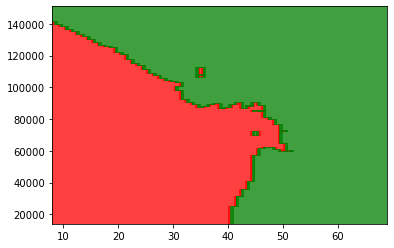

In [9]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [22]:
print(X1)
print(X2)
print(X_set)
print(y_set)
for i, j in enumerate(np.unique(y_set)):
    print(X_set[y_set == j,0])
    print(X_set[y_set == j,1])
    print(i,j)
    break;

[[ 8.  9. 10. ... 67. 68. 69.]
 [ 8.  9. 10. ... 67. 68. 69.]
 [ 8.  9. 10. ... 67. 68. 69.]
 ...
 [ 8.  9. 10. ... 67. 68. 69.]
 [ 8.  9. 10. ... 67. 68. 69.]
 [ 8.  9. 10. ... 67. 68. 69.]]
[[ 14000.  14000.  14000. ...  14000.  14000.  14000.]
 [ 14001.  14001.  14001. ...  14001.  14001.  14001.]
 [ 14002.  14002.  14002. ...  14002.  14002.  14002.]
 ...
 [150997. 150997. 150997. ... 150997. 150997. 150997.]
 [150998. 150998. 150998. ... 150998. 150998. 150998.]
 [150999. 150999. 150999. ... 150999. 150999. 150999.]]
[[4.40e+01 3.90e+04]
 [3.20e+01 1.20e+05]
 [3.80e+01 5.00e+04]
 [3.20e+01 1.35e+05]
 [5.20e+01 2.10e+04]
 [5.30e+01 1.04e+05]
 [3.90e+01 4.20e+04]
 [3.80e+01 6.10e+04]
 [3.60e+01 5.00e+04]
 [3.60e+01 6.30e+04]
 [3.50e+01 2.50e+04]
 [3.50e+01 5.00e+04]
 [4.20e+01 7.30e+04]
 [4.70e+01 4.90e+04]
 [5.90e+01 2.90e+04]
 [4.90e+01 6.50e+04]
 [4.50e+01 1.31e+05]
 [3.10e+01 8.90e+04]
 [4.60e+01 8.20e+04]
 [4.70e+01 5.10e+04]
 [2.60e+01 1.50e+04]
 [6.00e+01 1.02e+05]
 [3.80e+01

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

# Visualising test set result

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()